In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("brainstroke.csv")

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [25]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [27]:
#dropar colunas que não serão utilizadas
df.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)
df = df.dropna()
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


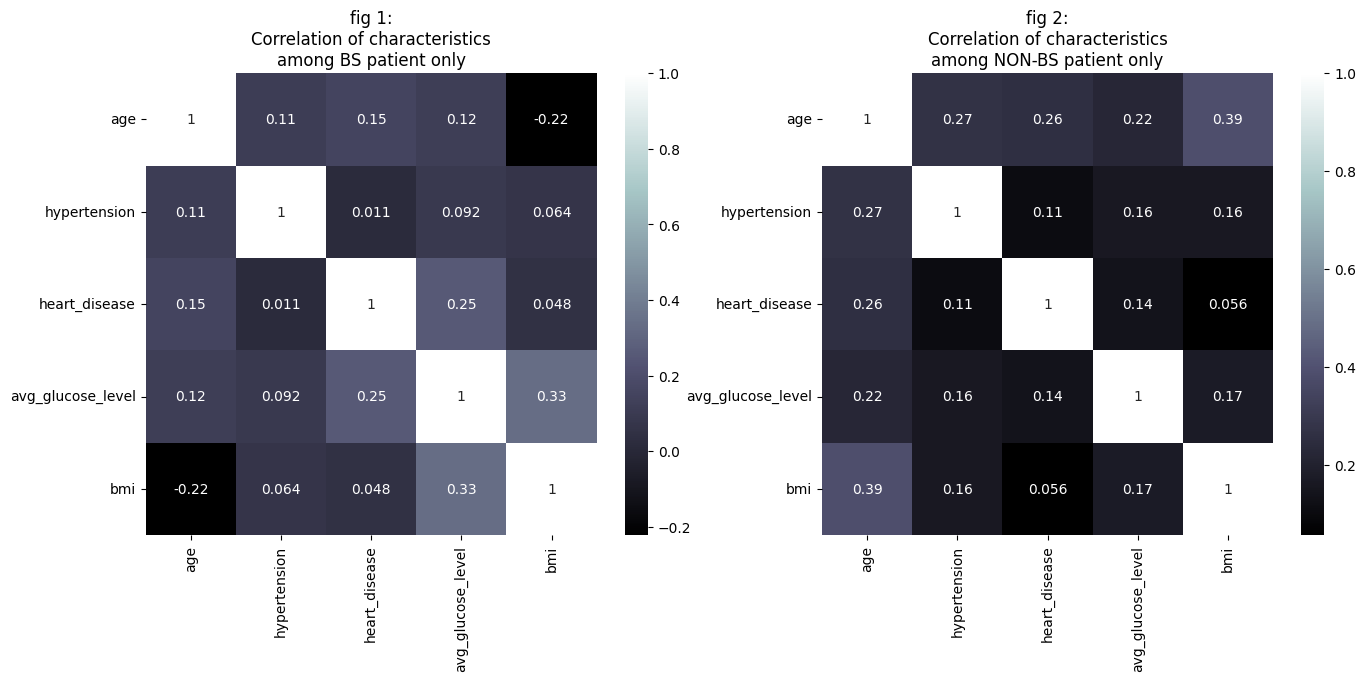

In [46]:
#buscando correlações
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title="Among Brain Stroke patient"
df_Y = df.loc[df['stroke']==1]
Corr_1 = df_Y[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
ax_1 = sns.heatmap(Corr_1.corr(), annot=True, cmap="bone") 
ax_1.set(title='fig 1:\nCorrelation of characteristics\namong BS patient only')
plt.subplot(122)
df_N = df.loc[df['stroke']==0]
Corr_2 = df_N[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
ax_2 = sns.heatmap(Corr_2.corr(), annot=True, cmap="bone") 
ax_2.set(title='fig 2:\nCorrelation of characteristics\namong NON-BS patient only')
plt.show()

In [28]:
from sklearn.preprocessing import OrdinalEncoder
#aplicar OrdinalEncoding nas colunas gender e smoking_status, visto que estão setadas como "objetos" e tendem a ter importância no resultado final.
#categorizamos os objetos destas colunas em ID's numéricos
ord_enc = OrdinalEncoder()
df["gender"] = ord_enc.fit_transform(df[["gender"]])
df["smoking_status"] = ord_enc.fit_transform(df[["smoking_status"]])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   float64
 7   stroke             4981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 311.4 KB


In [30]:
# Definição dos imputs e do nosso objetivo
from sklearn.model_selection import GridSearchCV,train_test_split 
x = df.drop('stroke', axis= 1)
y = df['stroke']

# dividimos os valores em variaveis de treino e teste com estado randômico de 25 e a porcentagem de 80% para treino e 20% para teste
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=25, test_size=0.20)
x_train.shape , x_test.shape,y_train.shape,y_test.shape

((3984, 7), (997, 7), (3984,), (997,))

Criando a Random Forest

In [31]:
# Iniciando a floresta e treinando o modelo
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(x_train, y_train)
# fazendo as previsões
preds = clf.predict(x_train)

In [32]:
# printando os resultados de treino e teste 
print (clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

1.0
0.9478435305917753


Modelo está overfitado, ou seja, o treino está "memorizando" os resultados  e com uma acurácia extremamente alta. Caracterizando o Overfiting

In [33]:
# Analisar quais variaveis o modelo acha que são mais importante
pd.DataFrame(clf.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)

,0
avg_glucose_level,0.318455
bmi,0.285000
age,0.251792
smoking_status,0.068572
gender,0.027791
hypertension,0.024867
heart_disease,0.023522


In [34]:
# Número de árvores na floresta
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis da árvore
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Número mínimo de amostras necessárias em cada nó folha
min_samples_leaf = [1, 2, 3, 4]
# Método de seleção de amostras para treinamento de cada árvore
bootstrap = [True, False]
# Critério "Entropia"
criterion=['entropy']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [35]:
# Iniciamos a pesquisa e em seguida ajustamos um novo classificador de floresta aleatória nos parâmetros encontrados na pesquisa aleatória anterior
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=30, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [36]:
# Visualizando os valores dos parâmetros que a pesquisa aleatória encontrou
rf_random.best_params_

{'n_estimators': 1135,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [37]:
# Avaliação novamente do modelo
print (rf_random.score(x_train, y_train))
print(rf_random.score(x_test, y_test))

0.9661144578313253
0.9488465396188566


Modelo agora aparenta não estar com Overfiting, pois o valor de teste é inferior a 100%

Daqui para baixo é a busca por uma parametrização utilizando alguns valores aleatórios. 

Isto irá encontrar os melhores parâmetros para a execução e depois retornar estes valores para utilização.

In [38]:
# alocando varios parâmetros para buscar qual o melhor
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [39]:
# Retreino da floresta
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Inicialização da floresta com os valores do param_gri encontrados anteriormente
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=8,
             param_grid={'max_depth': [170, 180, 190, 200, 210, 220],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([2100, 2150, 2200, 2250, 2300])},
             verbose=2)

In [40]:
# Retornando os melhores parâmetros para serem utilizados.
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 170,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2150}

In [41]:
# printando novamente os resultados obtidos na floresta com os melhores parâmetros.
print (grid_rf_search.score(x_train, y_train))
print(grid_rf_search.score(x_test, y_test))

0.9673694779116466
0.9488465396188566
